<a href="https://colab.research.google.com/github/cleysonl/Pytorch/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [0]:
import torch

In [0]:
w = torch.tensor(2.0,requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)

def forward(x):
  y=w*x+b
  return y

In [4]:
x= torch.tensor([[1.0],[2.0]])
forward(x)

tensor([[5.],
        [7.]], grad_fn=<AddBackward0>)

### Linear Class

In [5]:
from torch.nn import Linear
torch.manual_seed(1)

In [6]:
model = Linear(in_features=1,out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [7]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


### Custon Modules

In [0]:
import torch.nn as nn

# Use inheritance so we can leverage from our base class nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    # super().__init__() -> allows for more freedom in the use of multiple inheritance from parent classes
    super().__init__()
    self.linear= nn.Linear(input_size, output_size)
  def forward(self,x):
    pred = self.linear(x)
    return pred

In [9]:
torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [10]:
x = torch.tensor([[1.0],[2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


### Creating Dataset

In [0]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

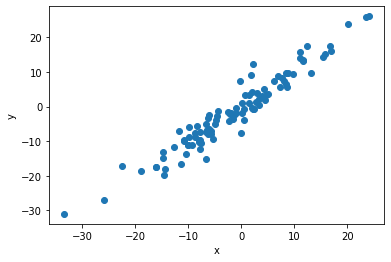

In [12]:
X = torch.randn(100,1)*10
y=X + 3*torch.randn(100,1)
plt.plot(X.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')


In [0]:
# Use inheritance so we can leverage from our base class nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    # super().__init__() -> allows for more freedom in the use of multiple inheritance from parent classes
    super().__init__()
    self.linear= nn.Linear(input_size, output_size)
  def forward(self,x):
    pred = self.linear(x)
    return pred

In [14]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [15]:
[w,b] = model.parameters()
print(w, b)
w1 = w[0][0].item()
b1 = b[0].item()
print(w1,b1)


Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
0.5152631998062134 -0.44137823581695557


In [0]:
def get_params():
  return (w[0][0].item(),b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title 
  w1, b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X,y)
  plt.show()
  

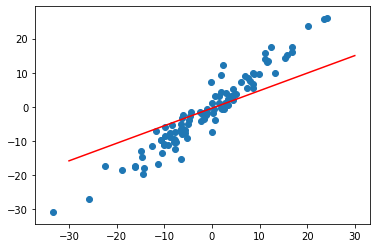

In [18]:
plot_fit('Initial Model')

### Specifying Loss and Optimizer

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, )

### Training the Model

In [20]:
epochs =100
losses = []

for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 36.44832992553711
epoch: 1 loss: 25.84706687927246
epoch: 2 loss: 19.274919509887695
epoch: 3 loss: 15.200485229492188
epoch: 4 loss: 12.674422264099121
epoch: 5 loss: 11.10822868347168
epoch: 6 loss: 10.137072563171387
epoch: 7 loss: 9.534791946411133
epoch: 8 loss: 9.161184310913086
epoch: 9 loss: 8.92933464050293
epoch: 10 loss: 8.785365104675293
epoch: 11 loss: 8.69587516784668
epoch: 12 loss: 8.640158653259277
epoch: 13 loss: 8.605380058288574
epoch: 14 loss: 8.58358097076416
epoch: 15 loss: 8.569830894470215
epoch: 16 loss: 8.56106948852539
epoch: 17 loss: 8.555403709411621
epoch: 18 loss: 8.551656723022461
epoch: 19 loss: 8.549099922180176
epoch: 20 loss: 8.547282218933105
epoch: 21 loss: 8.545924186706543
epoch: 22 loss: 8.54485034942627
epoch: 23 loss: 8.543954849243164
epoch: 24 loss: 8.543170928955078
epoch: 25 loss: 8.54245662689209
epoch: 26 loss: 8.541786193847656
epoch: 27 loss: 8.541145324707031
epoch: 28 loss: 8.540521621704102
epoch: 29 loss: 8.53991031